In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from isocodes import countries

pd.set_option('display.max_columns', 26) # show all columns in the output
sns.set_theme() # seaborn styling
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [2]:
df = pd.read_csv('./data/world_values_survey/WVS_Cross-National_Wave_7_csv_v6_0.csv',
                 sep=',',
                 usecols=[ # Because the dataset is huge, just import the following columns:
                     "A_YEAR", "B_COUNTRY_ALPHA", "J_INTDATE", # "A_STUDY", "A_WAVE", Metadaten des Interviews für die Auswertung
                     "G_TOWNSIZE", "G_TOWNSIZE2", "H_SETTLEMENT", "H_URBRURAL", # 
                     "Q5", "Q43", # Social Values, Norms, Stereotypes
                     "Q71", "Q72", "Q73", # Social Capital, Trust and Organizational Memberships
                     "Q109", "Q110", # Economic values
                ],
                dtype={'B_COUNTRY_ALPHA': 'category'} # just overriding this as everything else is correctly detected automatically by Pandas
)
df.rename(columns={
        "A_YEAR": "interview_year",
        "J_INTDATE": "interview_date",
        "B_COUNTRY_ALPHA": "country_iso",
        "G_TOWNSIZE": "townsize",
        "G_TOWNSIZE2": "townsize_2",
        "H_SETTLEMENT": "settlement",
        "H_URBRURAL": "urban_rural"
    },
    inplace=True
)

df.sample(n=10, random_state=2024)

,interview_year,country_iso,interview_date,townsize,townsize_2,settlement,urban_rural,Q5,Q43,Q71,Q72,Q73,Q109,Q110
17813,2018,CHN,20180807,7,4,4,1,2,3,2,2,2,5,5
35755,2018,IDN,20180604,2,1,5,2,1,1,3,3,3,8,7
27223,2022,GBR,20220526,7,4,2,1,2,1,3,4,3,3,6
76962,2020,SGP,-4,8,5,1,1,2,1,2,3,2,3,4
37488,2023,IND,20230609,6,3,3,1,1,3,4,4,4,-1,-1
72202,2018,PRI,20180803,5,3,4,1,2,3,3,3,3,1,1
6214,2018,BGD,20181217,5,3,2,2,1,3,1,1,1,2,3
28422,2022,GBR,20220829,7,4,3,1,2,1,4,3,3,3,5
69886,2018,PER,20180904,1,1,5,2,1,1,2,3,2,7,6
90239,2017,USA,20170502,8,5,3,1,2,1,3,4,4,5,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97220 entries, 0 to 97219
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   interview_year  97220 non-null  int64   
 1   country_iso     97220 non-null  category
 2   interview_date  97220 non-null  int64   
 3   townsize        97220 non-null  int64   
 4   townsize_2      97220 non-null  int64   
 5   settlement      97220 non-null  int64   
 6   urban_rural     97220 non-null  int64   
 7   Q5              97220 non-null  int64   
 8   Q43             97220 non-null  int64   
 9   Q71             97220 non-null  int64   
 10  Q72             97220 non-null  int64   
 11  Q73             97220 non-null  int64   
 12  Q109            97220 non-null  int64   
 13  Q110            97220 non-null  int64   
dtypes: category(1), int64(13)
memory usage: 9.7 MB


### For further analysis: How many interviews conducted per country and in which years?

In [4]:
df.describe()

,interview_year,interview_date,townsize,townsize_2,settlement,urban_rural,Q5,Q43,Q71,Q72,Q73,Q109,Q110
count,97220.000000,9.722000e+04,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000,97220.000000
mean,2019.132082,1.905207e+07,5.144888,3.021138,3.082586,1.319420,1.509556,2.078235,2.460307,2.822701,2.652746,3.968731,4.372341
std,1.601004,4.658281e+06,2.689833,1.721306,1.538648,0.483092,0.950227,1.035008,1.350511,1.190471,1.219013,2.812444,3.007810
min,2017.000000,-5.000000e+00,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,2018.000000,2.018022e+07,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,2018.000000,2.018111e+07,6.000000,3.000000,3.000000,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,2020.000000,2.020041e+07,8.000000,5.000000,5.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,6.000000,7.000000
max,2023.000000,2.023070e+07,8.000000,5.000000,5.000000,2.000000,4.000000,3.000000,4.000000,4.000000,4.000000,10.000000,10.000000


Year of data collection ranges from 2017 (min) to 2023 (max).

In [5]:
# Our analysis focuses on these countries:
selected_countries = [
    "ARG", "USA", "ARM", "UZB", "DEU", "ZWE", "VNM", "GRC", "HKG", "JPN", "CHN"
]

There's no particular reason for the selection of these countries. It should just be a representation of countries with different GDP and economic development status.

In [6]:
no_of_interviews_per_country_df = df.value_counts(subset=["country_iso", "interview_year"]).reset_index() # get answers as DataFrame instead of Series

no_of_interviews_per_country_df["country_name"] = no_of_interviews_per_country_df.apply(
    lambda x: countries.get(alpha_3=x["country_iso"])["name"] if countries.get(alpha_3=x["country_iso"]) else None,
    axis=1
)
no_of_interviews_per_country_df

,country_iso,interview_year,count,country_name
0,CAN,2020,4018,Canada
1,IDN,2018,3200,Indonesia
2,CHN,2018,3036,China
3,GBR,2022,2609,United Kingdom
4,USA,2017,2596,United States
...,...,...,...,...
61,ARG,2017,1003,Argentina
62,URY,2022,1000,Uruguay
63,CYP,2019,1000,Cyprus
64,CHL,2018,1000,Chile


In [7]:
no_of_interviews_per_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country_iso     66 non-null     category
 1   interview_year  66 non-null     int64   
 2   count           66 non-null     int64   
 3   country_name    65 non-null     object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.3+ KB


In [8]:
# Checking number of interviews per selected country
no_of_interviews_per_country_df.loc[no_of_interviews_per_country_df["country_iso"].isin(selected_countries), :].sort_values(by="count", ascending=False)

,country_iso,interview_year,count,country_name
2,CHN,2018,3036,China
4,USA,2017,2596,United States
7,HKG,2018,2075,Hong Kong
17,DEU,2018,1528,Germany
22,JPN,2019,1353,Japan
28,UZB,2022,1250,Uzbekistan
33,ARM,2021,1223,Armenia
35,ZWE,2020,1215,Zimbabwe
42,VNM,2020,1200,Viet Nam
48,GRC,2017,1200,Greece


In [9]:
# Answers that have a value of < 0 are of type "Don't know", "No answer", "Not asked" or "Missing / n/a"
# We will exlude them in the further analysis for all relevant questions
valid_answers_filtered_df = df.loc[(df["Q5"] > 0) & (df["Q43"] > 0) & (df["Q71"] > 0) & (df["Q72"] > 0) & (df["Q73"] > 0) & (df["Q109"] > 0) & (df["Q110"] > 0), :]

no_of_interviews_per_country_after_filter_df = valid_answers_filtered_df.value_counts(subset=["country_iso", "interview_year"]).reset_index() # get answers as DataFrame instead of Series

# Checking number of interviews per selected country, after filtering
no_of_interviews_per_country_after_filter_df.loc[no_of_interviews_per_country_after_filter_df["country_iso"].isin(selected_countries), :].sort_values(by="count", ascending=False)

,country_iso,interview_year,count
2,CHN,2018,2962
3,USA,2017,2521
6,HKG,2018,2014
18,DEU,2018,1337
32,ZWE,2020,1182
36,VNM,2020,1156
40,UZB,2022,1109
44,ARM,2021,1101
48,GRC,2017,1059
50,JPN,2019,1050


At least 1003 interviews for all selected countries and 870 after filtering out invalid or missing data. This is a good data basis for the analysis. However, note that there is more than three times more interview data for China than Argentina indicating a rather imbalanced data set (bad for classification). 

In general, the most recent interview data in the World Values Survey dataset is from 2023, the oldest from 2017 - for our selection of countries, interviews have been conducted between 2017 (e.g. Argentina) and 2022 (Uzbekistan). It needs to be stated here that responses may differ over the years across different countries. We will however use data from the complete range in order to have data for all the countries we're interested in for this analysis.

### Preparing the mean answer scores of relevant questions

In [10]:
# .describe() already offers the mean and std-deviation across all rows
# This is what we need for further analysis
q5_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q5"]
q43_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q43"]

# Preparation for section 2):
q71_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q71"]
q72_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q72"]
q73_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q73"]

# Preparation for section 3):
q109_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q109"]
q110_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q110"]
q43_description_df

,count,mean,std,min,25%,50%,75%,max
country_iso,,,,,,,,
AND,966.0,1.804348,0.823251,1.0,1.0,2.0,3.0,3.0
ARG,870.0,2.421839,0.778143,1.0,2.0,3.0,3.0,3.0
ARM,1101.0,2.377838,0.886679,1.0,1.0,3.0,3.0,3.0
AUS,1663.0,1.831028,0.755055,1.0,1.0,2.0,2.0,3.0
BGD,1128.0,2.804078,0.568081,1.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
USA,2521.0,1.940500,0.774872,1.0,1.0,2.0,3.0,3.0
UZB,1109.0,1.771867,0.591213,1.0,1.0,2.0,2.0,3.0
VEN,1190.0,2.562185,0.721471,1.0,2.0,3.0,3.0,3.0


***
## 1) Economy
**Independent variable**: GDP per capita in US-$

**Dependent variables**: Mean of Q5, Q43

### 1.1) Relevant Questions: Q5 and Q43
- **Q5: Important in life: Work.**
    - Current view on the importance of work in the life of the respondent.
    - Possible answers: (1) Very important, (2) Rather important, (3) Not very important, (4) Not at all important
- **Q43: Future changes: Less importance placed on work.**
    - View on a decreasing importance of work in the life of the respondent.
    - Possible answers: (1) Good thing, (2) Don't mind, (3) Bad thing

### 1.2) Hypothesis
The higher a country's GDP per capita, the more importance is attached to work today and in the future.

This would mean: the higher a country's GDP per capita, the lower the values for Q5 and the higher the values for Q43.

### 1.3) Sources
Additional data used for [GDP data][1]:
- [World Bank (2023) – with minor processing by Our World in Data. “GDP per capita – World Bank – In constant 2017 international $” [dataset]. World Bank, “World Bank World Development Indicators” [original data]. Retrieved June 18, 2024 from https://ourworldindata.org/grapher/gdp-per-capita-worldbank][1]

[1]: https://ourworldindata.org/grapher/gdp-per-capita-worldbank

In [11]:
gdp_per_capita_df = pd.read_csv("./data/gdp/gdp-per-capita-worldbank.csv",
                 sep=",",
                 names=[
                     "country_name", "country_iso", "year", "gdp_per_capita"
                 ],
                 header=0,
                 dtype={
                     "country_name": "category",
                     "country_iso": "category"
                    } # just overriding this as everything else is correctly detected automatically by Pandas
)
gdp_per_capita_df

,country_name,country_iso,year,gdp_per_capita
0,Afghanistan,AFG,2002,1280.4631
1,Afghanistan,AFG,2003,1292.3335
2,Afghanistan,AFG,2004,1260.0605
3,Afghanistan,AFG,2005,1352.3207
4,Afghanistan,AFG,2006,1366.9932
...,...,...,...,...
6557,Zimbabwe,ZWE,2018,2399.6216
6558,Zimbabwe,ZWE,2019,2203.3967
6559,Zimbabwe,ZWE,2020,1990.3195
6560,Zimbabwe,ZWE,2021,2115.1445


In [12]:
gdp_per_capita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6562 entries, 0 to 6561
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country_name    6562 non-null   category
 1   country_iso     6133 non-null   category
 2   year            6562 non-null   int64   
 3   gdp_per_capita  6562 non-null   float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 135.5 KB


In [13]:
# There are rows where country_iso is null, so after short look into the CSV,
# Drop rows for regions (e.g. EU) without iso_code
gdp_per_capita_df.dropna(axis=0, inplace=True)
gdp_per_capita_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6133 entries, 0 to 6561
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country_name    6133 non-null   category
 1   country_iso     6133 non-null   category
 2   year            6133 non-null   int64   
 3   gdp_per_capita  6133 non-null   float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 174.9 KB


In [14]:
# Select most recent data of the dataset (2022)
gdp_per_capita_df = gdp_per_capita_df.loc[gdp_per_capita_df["year"]==2022,:]
gdp_per_capita_df

,country_name,country_iso,year,gdp_per_capita
52,Albania,ALB,2022,15492.0670
85,Algeria,DZA,2022,11198.2330
118,Angola,AGO,2022,5906.1157
151,Antigua and Barbuda,ATG,2022,22321.8700
184,Argentina,ARG,2022,22461.4410
...,...,...,...,...
6429,Vanuatu,VUT,2022,2785.9038
6462,Vietnam,VNM,2022,11396.5310
6495,World,OWID_WRL,2022,17527.1900
6528,Zambia,ZMB,2022,3365.8738


In [15]:
economy_analysis_df = gdp_per_capita_df.join(q5_description_df, on="country_iso", how="inner")
economy_analysis_df = economy_analysis_df.join(q43_description_df, on="country_iso", how="inner", rsuffix="_q43").dropna()
economy_analysis_df.sample(20)

,country_name,country_iso,year,gdp_per_capita,count,mean,std,min,25%,50%,75%,max,count_q43,mean_q43,std_q43,min_q43,25%_q43,50%_q43,75%_q43,max_q43
4907,Romania,ROU,2022,32495.9080,1063.0,1.717780,0.771023,1.0,1.0,2.0,2.0,4.0,1063.0,2.490122,0.784529,1.0,2.0,3.0,3.0,3.0
2219,Germany,DEU,2022,53969.6250,1337.0,1.795064,0.875416,1.0,1.0,2.0,2.0,4.0,1337.0,1.902019,0.923805,1.0,1.0,2.0,3.0,3.0
5890,Thailand,THA,2022,17507.6210,1217.0,1.534922,0.701717,1.0,1.0,1.0,2.0,4.0,1217.0,2.253081,0.796813,1.0,2.0,2.0,3.0,3.0
3610,Malaysia,MYS,2022,28383.6200,1310.0,1.515267,0.621240,1.0,1.0,1.0,2.0,4.0,1310.0,2.129008,0.842528,1.0,1.0,2.0,3.0,3.0
2741,Iran,IRN,2022,15461.0790,1409.0,1.277502,0.580518,1.0,1.0,1.0,1.0,4.0,1409.0,2.616749,0.742885,1.0,3.0,3.0,3.0,3.0
1922,Ethiopia,ETH,2022,2381.1658,1013.0,1.099704,0.318919,1.0,1.0,1.0,1.0,4.0,1013.0,2.560711,0.774798,1.0,2.0,3.0,3.0,3.0
6054,Turkey,TUR,2022,33149.5000,2249.0,1.705647,0.771817,1.0,1.0,2.0,2.0,4.0,2249.0,1.938639,0.858165,1.0,1.0,2.0,3.0,3.0
3996,Mongolia,MNG,2022,12073.2450,1479.0,1.728871,0.802684,1.0,1.0,2.0,2.0,4.0,1479.0,1.815416,0.793499,1.0,1.0,2.0,2.0,3.0
217,Armenia,ARM,2022,16057.0070,1101.0,1.333333,0.695875,1.0,1.0,1.0,1.0,4.0,1101.0,2.377838,0.886679,1.0,1.0,3.0,3.0,3.0
2934,Japan,JPN,2022,41837.9100,1050.0,1.810476,0.812958,1.0,1.0,2.0,2.0,4.0,1050.0,2.443810,0.696707,1.0,2.0,3.0,3.0,3.0


In [16]:
# Filter data for selected_countries
economy_analysis_df = economy_analysis_df.loc[economy_analysis_df["country_iso"].isin(selected_countries), :]
economy_analysis_df["country_name"].describe()

count           11
unique          11
top       Zimbabwe
freq             1
Name: country_name, dtype: object

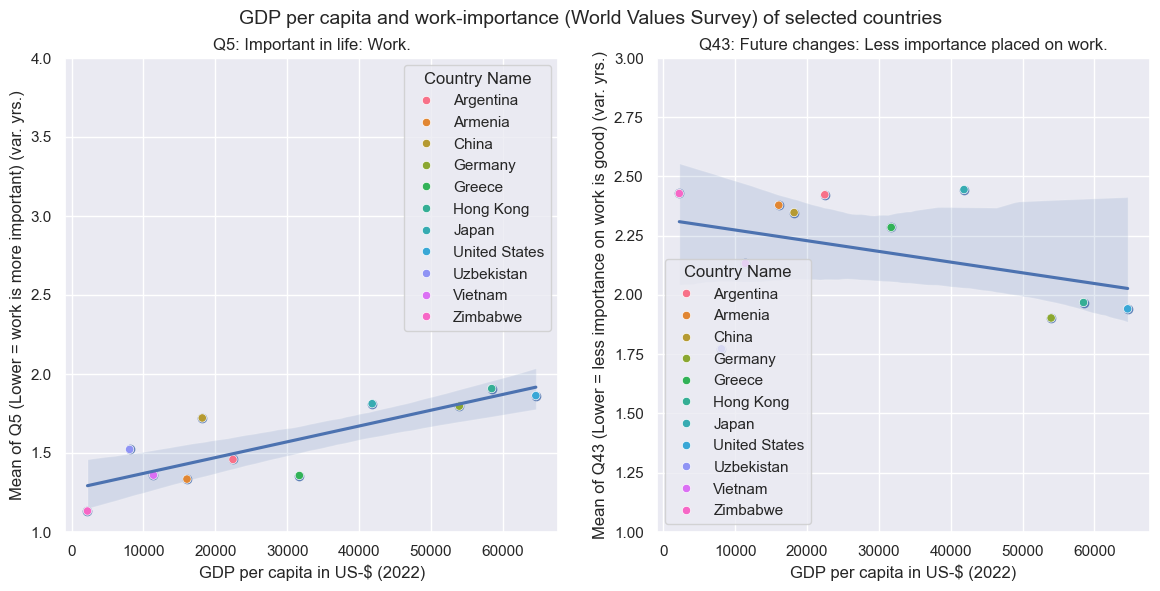

In [17]:
# Get unique values for hue because just using hue="country_name" will show all possible categeorical values,
# even though economy_analysis_df["country_name"].describe() shows it only has 11 unique values...
unique_country_names = economy_analysis_df["country_name"].unique()

fig, axs = plt.subplots(1,2, figsize=(14,6))

sns.regplot(x="gdp_per_capita",
            y="mean",
            #hue="country_iso",
            ax=axs[0],
            #sizes=(40, 400),
            ci=95,
            data=economy_analysis_df
)
q5_plot = sns.scatterplot(x="gdp_per_capita",
            y="mean",
            hue="country_name",
            hue_order=unique_country_names,
            ax=axs[0],
            #sizes=(40, 400),
            data=economy_analysis_df
)
q5_plot.set_ylim(bottom=1, top=4)
q5_plot.set_ylabel("Mean of Q5 (Lower = work is more important) (var. yrs.)")
q5_plot.set_xlabel("GDP per capita in US-$ (2022)")
q5_plot.set_title("Q5: Important in life: Work.")

sns.regplot(x="gdp_per_capita",
            y="mean_q43",
            #hue="country_iso",
            ax=axs[1],
            #sizes=(40, 400),
            ci=95,
            data=economy_analysis_df
)
q43_plot = sns.scatterplot(x="gdp_per_capita",
            y="mean_q43",
            hue="country_name",
            hue_order=unique_country_names,
            ax=axs[1],
            #sizes=(40, 400),
            data=economy_analysis_df
)
q43_plot.set_ylim(bottom=1, top=3)
q43_plot.set_ylabel("Mean of Q43 (Lower = less importance on work is good) (var. yrs.)")
q43_plot.set_xlabel("GDP per capita in US-$ (2022)")
q43_plot.set_title("Q43: Future changes: Less importance placed on work.")

axs[0].legend(title="Country Name")
axs[1].legend(title="Country Name")

fig.suptitle('GDP per capita and work-importance (World Values Survey) of selected countries', fontsize=14)
fig.subplots_adjust(top=0.9)

plt.show()

### 1.4) Verification of the Hypothesis
**Assumption:**

The higher a country's GDP per capita, the more importance is attached to work 1) today and 2) in the future.

This would mean: the higher a country's GDP per capita, 1) the lower the values for Q5 and 2) the higher the values for Q43.

**Actual result:**

🚧 1) Q5 - Assumption not approved: The higher a country's GDP per capita, the higher the values for Q5. This indicates that countries with a higher GDP tend to attribute less importance to work than countries with lower GDP per capita. Without further investigating R^2 and error values, there seems to be a positive correlation between GDP per capita and a decrease in the importance of work in life.

🚧 2) Q43 - Not approved: The higher a country's GDP per capita, the lower the values for Q43. This indicates that countries with a higher GDP per capita think that less importance placed on work in the future would neither be bad nor good (indicated through values at around (2) "Don't mind"). Countries with a lower GDP per capita tend to think that less importance on work in the future would be a rather bad thing.
Compared to Q5, comparatively big confidence interval for 5% error (95% CI). Therefore, the question arises whether there's an actual correlation between these data points.

Next step: Evalute R^2-values and error values for each plot's regression to see whether there's an actual meaningful correlation.

***
## 2) Human Development Index
"The Human Development Index (HDI) is a statistical **composite index of life expectancy, education** (mean years of schooling completed and expected years of schooling upon entering the education system), **and per capita income indicators**, which is used to rank countries into four tiers of human development. A country scores a higher level of HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher. It was developed by Pakistani economist Mahbub ul-Haq and was further used to measure a country's development by the United Nations Development Programme (UNDP)'s Human Development Report Office." ([1])

**Independent variable**: HDI values

**Dependent variables**: Mean of Q71, Q72, Q73

### 2.1) Relevant Questions: Q71, Q72, Q73
- **Q71: Confidence: The Government**
    - Level of conficence placed in the government.
    - Possible answers: (1) A great deal, (2) Quite a lot, (3) Not very much, (4) None at all
- **Q72: Confidence: The Political Parties**
    - Level of conficence placed in political parties.
    - Possible answers: (1) A great deal, (2) Quite a lot, (3) Not very much, (4) None at all
- **Q73: Confidence: Parliament**
    - Level of conficence placed in parliament.
    - Possible answers: (1) A great deal, (2) Quite a lot, (3) Not very much, (4) None at all

### 2.2) Hypothesis
The higher a country's HDI value, the higher the respective confidence values for government, political parties and parliament.

This would mean: the higher a country's HDI value, the lower the values for Q71, Q72 and Q73 (indicating a great deal of trust).

### 2.3) Sources
Additional data used, including the [HDI data set][2]:
- [Wikipedia contributors, "Human Development Index," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Human_Development_Index&oldid=1224289494 (accessed June 20, 2024).][1]
- [Banerjee, Sourav (2024) "Human Development World Index", https://www.kaggle.com/datasets/iamsouravbanerjee/human-development-index-dataset (accessed June 20, 2024)][2]

[1]: https://en.wikipedia.org/wiki/Human_Development_Index
[2]: https://www.kaggle.com/datasets/iamsouravbanerjee/human-development-index-dataset

In [18]:
hdi_df = pd.read_csv("./data/hdi/hdi_full.csv",
                 sep=",",
                 usecols=[ # Because the dataset is huge, just import the following columns with most recent HDI index data:
                     "ISO3", "Country", "Human Development Index (2021)"
                ],
                dtype={
                    "ISO3": "category",
                    "Country": "category"
                } # just overriding this as everything else is correctly detected automatically by Pandas
)
hdi_df.rename(columns={
    "ISO3": "country_iso",
    "Country": "country_name",
    "Human Development Index (2021)": "hdi_2021"
}, inplace=True)
hdi_df

,country_iso,country_name,hdi_2021
0,AFG,Afghanistan,0.478
1,AGO,Angola,0.586
2,ALB,Albania,0.796
3,AND,Andorra,0.858
4,ARE,United Arab Emirates,0.911
...,...,...,...
190,WSM,Samoa,0.707
191,YEM,Yemen,0.455
192,ZAF,South Africa,0.713
193,ZMB,Zambia,0.565


In [19]:
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   country_iso   195 non-null    category
 1   country_name  195 non-null    category
 2   hdi_2021      191 non-null    float64 
dtypes: category(2), float64(1)
memory usage: 9.5 KB


In [20]:
hdi_df.dropna(axis=0, inplace=True) # delete 4 entries without an HDI 2021 index value
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 194
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   country_iso   191 non-null    category
 1   country_name  191 non-null    category
 2   hdi_2021      191 non-null    float64 
dtypes: category(2), float64(1)
memory usage: 10.8 KB


In [21]:
# Select data for the countries we are interested in
hdi_df = hdi_df.loc[hdi_df["country_iso"].isin(selected_countries), :]

In [22]:
hdi_analysis_df = hdi_df.join(q71_description_df, on="country_iso")
hdi_analysis_df = hdi_analysis_df.join(q72_description_df, on="country_iso", rsuffix="_q72")
hdi_analysis_df = hdi_analysis_df.join(q73_description_df, on="country_iso", rsuffix="_q73").dropna()
hdi_analysis_df.info()
hdi_analysis_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 5 to 194
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   country_iso   11 non-null     object  
 1   country_name  11 non-null     category
 2   hdi_2021      11 non-null     float64 
 3   count         11 non-null     float64 
 4   mean          11 non-null     float64 
 5   std           11 non-null     float64 
 6   min           11 non-null     float64 
 7   25%           11 non-null     float64 
 8   50%           11 non-null     float64 
 9   75%           11 non-null     float64 
 10  max           11 non-null     float64 
 11  count_q72     11 non-null     float64 
 12  mean_q72      11 non-null     float64 
 13  std_q72       11 non-null     float64 
 14  min_q72       11 non-null     float64 
 15  25%_q72       11 non-null     float64 
 16  50%_q72       11 non-null     float64 
 17  75%_q72       11 non-null     float64 
 18  max_q72       11

,country_iso,country_name,hdi_2021,count,mean,std,min,25%,50%,75%,max,count_q72,mean_q72,...,min_q72,25%_q72,50%_q72,75%_q72,max_q72,count_q73,mean_q73,std_q73,min_q73,25%_q73,50%_q73,75%_q73,max_q73
188,VNM,Viet Nam,0.703,1156.0,1.696367,0.593197,1.0,1.0,2.0,2.0,4.0,1156.0,1.793253,...,1.0,1.0,2.0,2.0,4.0,1156.0,1.729239,0.585726,1.0,1.0,2.0,2.0,4.0
87,JPN,Japan,0.925,1050.0,2.658095,0.718976,1.0,2.0,3.0,3.0,4.0,1050.0,2.827619,...,1.0,2.0,3.0,3.0,4.0,1050.0,2.771429,0.696678,1.0,2.0,3.0,3.0,4.0
32,CHN,China,0.768,2962.0,1.560432,0.601608,1.0,1.0,2.0,2.0,4.0,2962.0,1.721472,...,1.0,1.0,2.0,2.0,4.0,2962.0,1.693788,0.631083,1.0,1.0,2.0,2.0,4.0
184,USA,United States,0.921,2521.0,2.924633,0.911496,1.0,2.0,3.0,4.0,4.0,2521.0,3.145180,...,1.0,3.0,3.0,4.0,4.0,2521.0,3.096390,0.654526,1.0,3.0,3.0,4.0,4.0
72,HKG,Hong Kong,0.952,2014.0,2.514896,0.832479,1.0,2.0,2.0,3.0,4.0,2014.0,2.954320,...,1.0,3.0,3.0,3.0,4.0,2014.0,2.803873,0.718616,1.0,2.0,3.0,3.0,4.0
5,ARG,Argentina,0.842,870.0,2.928736,0.892096,1.0,2.0,3.0,4.0,4.0,870.0,3.235632,...,1.0,3.0,3.0,4.0,4.0,870.0,3.073563,0.762538,1.0,3.0,3.0,4.0,4.0
185,UZB,Uzbekistan,0.727,1109.0,1.711452,0.790092,1.0,1.0,2.0,2.0,4.0,1109.0,2.124436,...,1.0,1.0,2.0,3.0,4.0,1109.0,1.946799,0.899188,1.0,1.0,2.0,2.0,4.0
44,DEU,Germany,0.942,1337.0,2.636500,0.747921,1.0,2.0,3.0,3.0,4.0,1337.0,2.909499,...,1.0,3.0,3.0,3.0,4.0,1337.0,2.631264,0.741828,1.0,2.0,3.0,3.0,4.0
194,ZWE,Zimbabwe,0.593,1182.0,2.533841,1.047616,1.0,2.0,2.0,3.0,4.0,1182.0,2.981387,...,1.0,2.0,3.0,4.0,4.0,1182.0,2.698816,1.002443,1.0,2.0,3.0,4.0,4.0
68,GRC,Greece,0.887,1059.0,3.346553,0.735165,1.0,3.0,3.0,4.0,4.0,1059.0,3.444759,...,1.0,3.0,4.0,4.0,4.0,1059.0,3.313503,0.717007,1.0,3.0,3.0,4.0,4.0


In [23]:
# Just for fun, and just because we can, let's combine this also with the GDP per capita data:
# For that, because we see above that hdi_analysis_df["country_iso"] has type object, we need to change that datatype first
hdi_analysis_df["country_iso"] = hdi_analysis_df["country_iso"].astype("category")
hdi_analysis_df.set_index(keys="country_iso", inplace=True) # set index of this df to country_iso as preparation for the join (join on the index)

hdi_analysis_df = gdp_per_capita_df.join(hdi_analysis_df, on="country_iso", rsuffix="_gdp")
hdi_analysis_df = hdi_analysis_df.dropna(axis=0)

In [24]:
hdi_analysis_df.sample(10)

,country_name,country_iso,year,gdp_per_capita,country_name_gdp,hdi_2021,count,mean,std,min,25%,50%,75%,...,min_q72,25%_q72,50%_q72,75%_q72,max_q72,count_q73,mean_q73,std_q73,min_q73,25%_q73,50%_q73,75%_q73,max_q73
2934,Japan,JPN,2022,41837.9100,Japan,0.925,1050.0,2.658095,0.718976,1.0,2.0,3.0,3.0,...,1.0,2.0,3.0,3.0,4.0,1050.0,2.771429,0.696678,1.0,2.0,3.0,3.0,4.0
217,Armenia,ARM,2022,16057.0070,Armenia,0.759,1101.0,2.926431,1.023826,1.0,2.0,3.0,4.0,...,1.0,3.0,4.0,4.0,4.0,1101.0,3.260672,0.847556,1.0,3.0,3.0,4.0,4.0
6462,Vietnam,VNM,2022,11396.5310,Viet Nam,0.703,1156.0,1.696367,0.593197,1.0,1.0,2.0,2.0,...,1.0,1.0,2.0,2.0,4.0,1156.0,1.729239,0.585726,1.0,1.0,2.0,2.0,4.0
2219,Germany,DEU,2022,53969.6250,Germany,0.942,1337.0,2.636500,0.747921,1.0,2.0,3.0,3.0,...,1.0,3.0,3.0,3.0,4.0,1337.0,2.631264,0.741828,1.0,2.0,3.0,3.0,4.0
2285,Greece,GRC,2022,31704.4260,Greece,0.887,1059.0,3.346553,0.735165,1.0,3.0,3.0,4.0,...,1.0,3.0,4.0,4.0,4.0,1059.0,3.313503,0.717007,1.0,3.0,3.0,4.0,4.0
2582,Hong Kong,HKG,2022,58478.8830,Hong Kong,0.952,2014.0,2.514896,0.832479,1.0,2.0,2.0,3.0,...,1.0,3.0,3.0,3.0,4.0,2014.0,2.803873,0.718616,1.0,2.0,3.0,3.0,4.0
1216,China,CHN,2022,18187.8420,China,0.768,2962.0,1.560432,0.601608,1.0,1.0,2.0,2.0,...,1.0,1.0,2.0,2.0,4.0,2962.0,1.693788,0.631083,1.0,1.0,2.0,2.0,4.0
6297,United States,USA,2022,64623.1250,United States,0.921,2521.0,2.924633,0.911496,1.0,2.0,3.0,4.0,...,1.0,3.0,3.0,4.0,4.0,2521.0,3.096390,0.654526,1.0,3.0,3.0,4.0,4.0
6396,Uzbekistan,UZB,2022,8073.2104,Uzbekistan,0.727,1109.0,1.711452,0.790092,1.0,1.0,2.0,2.0,...,1.0,1.0,2.0,3.0,4.0,1109.0,1.946799,0.899188,1.0,1.0,2.0,2.0,4.0
6561,Zimbabwe,ZWE,2022,2207.9570,Zimbabwe,0.593,1182.0,2.533841,1.047616,1.0,2.0,2.0,3.0,...,1.0,2.0,3.0,4.0,4.0,1182.0,2.698816,1.002443,1.0,2.0,3.0,4.0,4.0


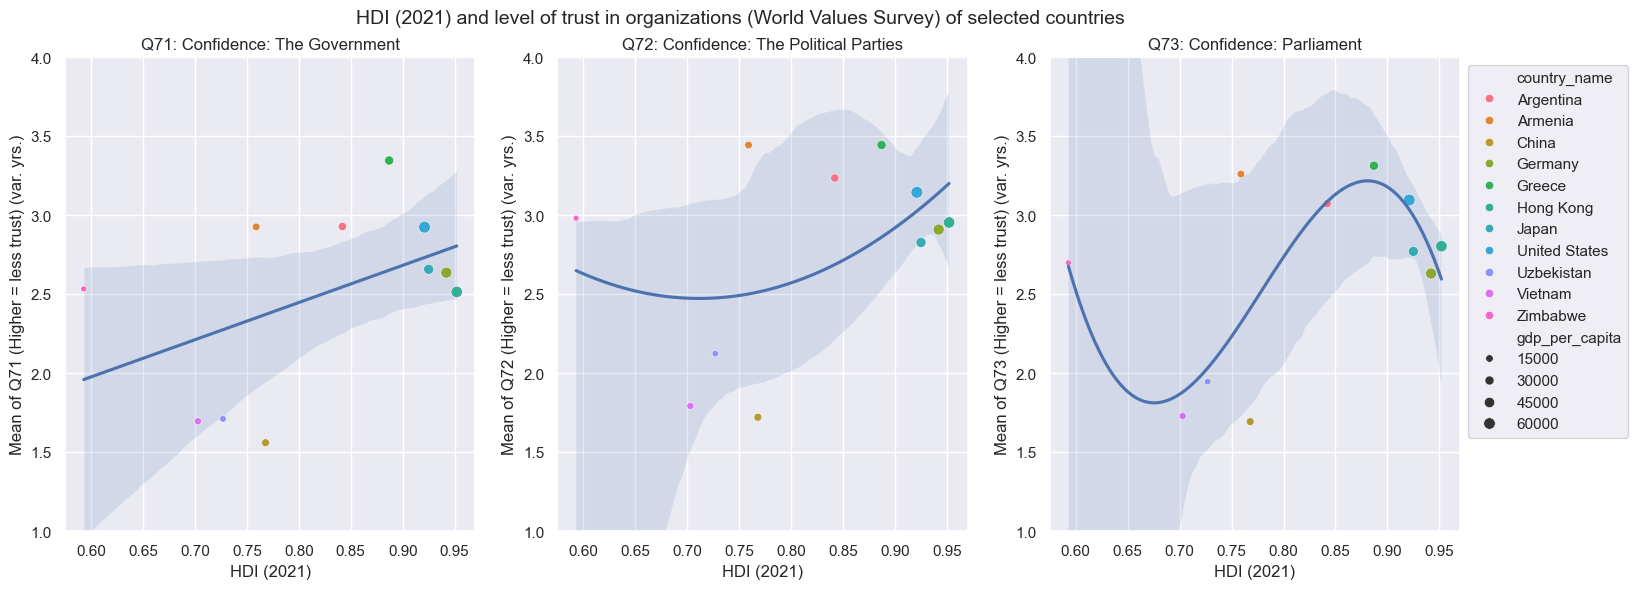

In [25]:
# Get unique values for hue because just using hue="country_name" will show all possible categeorical values,
# even though economy_analysis_df["country_name"].describe() shows it only has 11 unique values...
unique_country_names = hdi_analysis_df["country_name"].unique()

fig, axs = plt.subplots(1,3, figsize=(18,6))

# Choosing linear, quadratic and cubic regression plots for illustrative purposes - Which one seems to fit best?
sns.regplot(x="hdi_2021",
            y="mean",
            ax=axs[0],
            scatter=False,
            order=1, # linear
            data=hdi_analysis_df
)
q71_plot = sns.scatterplot(x="hdi_2021",
            y="mean",
            hue="country_name",
            size="gdp_per_capita",
            hue_order=unique_country_names,
            ax=axs[0],
            data=hdi_analysis_df
)
q71_plot.set_ylim(bottom=1, top=4)
q71_plot.set_ylabel("Mean of Q71 (Higher = less trust) (var. yrs.)")
q71_plot.set_xlabel("HDI (2021)")
q71_plot.set_title("Q71: Confidence: The Government")
q71_plot.get_legend().remove()

sns.regplot(x="hdi_2021",
            y="mean_q72",
            ax=axs[1],
            scatter=False,
            order=2, # quadratic
            data=hdi_analysis_df
)
q72_plot = sns.scatterplot(x="hdi_2021",
            y="mean_q72",
            hue="country_name",
            size="gdp_per_capita",
            hue_order=unique_country_names,
            ax=axs[1],
            data=hdi_analysis_df
)
q72_plot.set_ylim(bottom=1, top=4)
q72_plot.set_ylabel("Mean of Q72 (Higher = less trust) (var. yrs.)")
q72_plot.set_xlabel("HDI (2021)")
q72_plot.set_title("Q72: Confidence: The Political Parties")
q72_plot.get_legend().remove()

sns.regplot(x="hdi_2021",
            y="mean_q73",
            ax=axs[2],
            scatter=False,
            order=3, # cubic
            data=hdi_analysis_df
)
q73_plot = sns.scatterplot(x="hdi_2021",
            y="mean_q73",
            hue="country_name",
            size="gdp_per_capita",
            hue_order=unique_country_names,
            ax=axs[2],
            data=hdi_analysis_df
)
q73_plot.set_ylim(bottom=1, top=4)
q73_plot.set_ylabel("Mean of Q73 (Higher = less trust) (var. yrs.)")
q73_plot.set_xlabel("HDI (2021)")
q73_plot.set_title("Q73: Confidence: Parliament")

fig.suptitle("HDI (2021) and level of trust in organizations (World Values Survey) of selected countries", fontsize=14)
fig.subplots_adjust(top=0.9)

sns.move_legend(q73_plot, "upper left", bbox_to_anchor=(1, 1))

plt.show()

### 2.4) Verification of the Hypothesis
**Assumption:**

The higher a country's HDI value, the higher the respective confidence values for 1) government, 2) political parties and 3) parliament.

This would mean: the higher a country's HDI value, the lower the values for 1) Q71, 2) Q72 and 3) Q73 (indicating a great deal of trust).

**Actual result:**

🚧 1), 2) and 3) Q71, Q72, and Q73 - Assumption not approved: For the countries selected in this research, HDI does not uniformly positively affect the trust in political institutions. For countries such as China or Zimbabwe, trust indicators are relatively high according to the World Values Survey interview data, while for countries such as Argentina or Greece, that both have a higher HDI, trust in government, political parties and parliament is drastically lower. The three countries with the highest HDI values (and GDP per capita), Hong Kong, Japan and Germany, have higher trust values than Argentina and Greece, however lower trust values in comparison to China and Zimbabwe (U-shaped).

Overall, these graphs illustrate a complex relationship between HDI and trust in various governmental institutions. Higher HDI does not uniformly correlate with higher trust, indicating other influencing factors (e.g. political system).

Next step: Evalute R^2-values and error values for each plot's regression to see whether there's an actual meaningful correlation - using linear, quadratic and cubic regression plots. Hypothesis: cubic regression will have lowest error values

***
## 3) New business registrations

**Independent variables**: Mean of Q109, Q110

**Dependent variable**: New business registrations per 1,000 inhabitants

### 3.1) Relevant Questions: Q109, 110
- **Q109: Competition good or harmful**
    - Whether the respondent views economic competition as good or harmful
    - Possible answers: On a scale from (1) Competition is good to (10) Competition is harmful. Step size: 1
- **Q110: Success: hard work vs luck**
    - Whether the respondent thinks that success in life depends on hard work or rather on luck.
    - Possible answers: On a scale from (1)  In the long run, hard work usually brings a better life and (10) Hard work doesn´t generally bring success - it´s more a matter of luck and
connections. Step size: 1

### 3.2) Hypothesis
A positive view on competition (Q109 near 1) could be seen as one potential incentive for people to actually register a new company - hence, more business registrations would be expected.

The more respondents think that success depends on hard work (Q110 near 1), there more new business registrations would be expected to occur.

### 3.3) Sources
Additional data used:
- [World Bank Group (2020) "New business density (new registrations per 1,000 people ages 15-64)", https://data.worldbank.org/indicator/IC.BUS.NDNS.ZS?skipRedirection=true&view=map&year=2020 (accessed June 21, 2024)][3]

Important note about the dataset's data for China: "For China, only the data for Beijing and Shanghai were included." Hence, we can expect that the value given for China is higher than the actual national average across all regions (only economic hubs observed).

[3]: https://data.worldbank.org/indicator/IC.BUS.NDNS.ZS?skipRedirection=true&view=map&year=2020

In [26]:
new_business_df = pd.read_csv("./data/new_businesses/API_IC.BUS.NDNS.ZS_DS2_en_csv_v2_433101.csv",
                 sep=",",
                 usecols=[ # Because the dataset is huge, just import the following columns with most recent HDI index data:
                     "Country Name", "Country Code", "2020"
                ],
                dtype={
                    "Country Name": "category",
                    "Country Code": "category"
                } # just overriding this as everything else is correctly detected automatically by Pandas
)
new_business_df.rename(columns={
    "Country Code": "country_iso",
    "Country Name": "country_name",
    "2020": "new_businesses_per_1000_inhabitants_2020"
}, inplace=True)
new_business_df

,country_name,country_iso,new_businesses_per_1000_inhabitants_2020
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,NaN
2,Afghanistan,AFG,NaN
3,Africa Western and Central,AFW,0.790807
4,Angola,AGO,NaN
...,...,...,...
261,Kosovo,XKX,4.719729
262,"Yemen, Rep.",YEM,NaN
263,South Africa,ZAF,12.497580
264,Zambia,ZMB,1.074762


In [27]:
new_business_df.dropna(axis=0, inplace=True)
new_business_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 3 to 265
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   country_name                              147 non-null    category
 1   country_iso                               147 non-null    category
 2   new_businesses_per_1000_inhabitants_2020  147 non-null    float64 
dtypes: category(2), float64(1)
memory usage: 15.1 KB


In [28]:
# Select data for the countries we are interested in
new_business_df = new_business_df.loc[new_business_df["country_iso"].isin(selected_countries), :]
new_business_df

,country_name,country_iso,new_businesses_per_1000_inhabitants_2020
10,Armenia,ARM,2.855460
40,China,CHN,8.583741
55,Germany,DEU,1.358457
89,Greece,GRC,1.755010
96,"Hong Kong SAR, China",HKG,19.218990
119,Japan,JPN,0.448848
252,Uzbekistan,UZB,2.712999
257,Viet Nam,VNM,1.661228
265,Zimbabwe,ZWE,2.476631


In [29]:
new_business_df.set_index(keys="country_iso", inplace=True)
new_business_analysis_df = new_business_df.join(q109_description_df, on="country_iso")
new_business_analysis_df = new_business_analysis_df.join(q110_description_df, on="country_iso", rsuffix="_q110")
new_business_analysis_df

,country_name,new_businesses_per_1000_inhabitants_2020,count,mean,std,min,25%,50%,75%,max,count_q110,mean_q110,std_q110,min_q110,25%_q110,50%_q110,75%_q110,max_q110
country_iso,,,,,,,,,,,,,,,,,,
ARM,Armenia,2.855460,1101.0,2.891916,3.058541,1.0,1.0,1.0,5.0,10.0,1101.0,4.058129,3.530681,1.0,1.0,2.0,7.0,10.0
CHN,China,8.583741,2962.0,3.396354,2.202259,1.0,2.0,3.0,5.0,10.0,2962.0,3.715057,2.722907,1.0,1.0,3.0,5.0,10.0
DEU,Germany,1.358457,1337.0,3.442034,2.159050,1.0,2.0,3.0,5.0,10.0,1337.0,5.275243,2.548146,1.0,3.0,5.0,7.0,10.0
GRC,Greece,1.755010,1059.0,4.107649,2.292366,1.0,2.0,4.0,5.0,10.0,1059.0,5.247403,2.452802,1.0,3.0,5.0,7.0,10.0
HKG,"Hong Kong SAR, China",19.218990,2014.0,4.093347,1.980086,1.0,3.0,4.0,5.0,10.0,2014.0,4.742304,2.381546,1.0,3.0,5.0,7.0,10.0
JPN,Japan,0.448848,1050.0,4.498095,2.245321,1.0,3.0,4.0,5.0,10.0,1050.0,4.799048,2.169772,1.0,3.0,5.0,6.0,10.0
UZB,Uzbekistan,2.712999,1109.0,3.326420,2.851916,1.0,1.0,2.0,5.0,10.0,1109.0,5.961226,3.139554,1.0,3.0,6.0,9.0,10.0
VNM,Viet Nam,1.661228,1156.0,3.320934,2.625208,1.0,1.0,2.0,5.0,10.0,1156.0,3.513841,2.763206,1.0,1.0,3.0,5.0,10.0
ZWE,Zimbabwe,2.476631,1182.0,4.146362,3.662021,1.0,1.0,2.0,8.0,10.0,1182.0,2.500846,2.733661,1.0,1.0,1.0,3.0,10.0


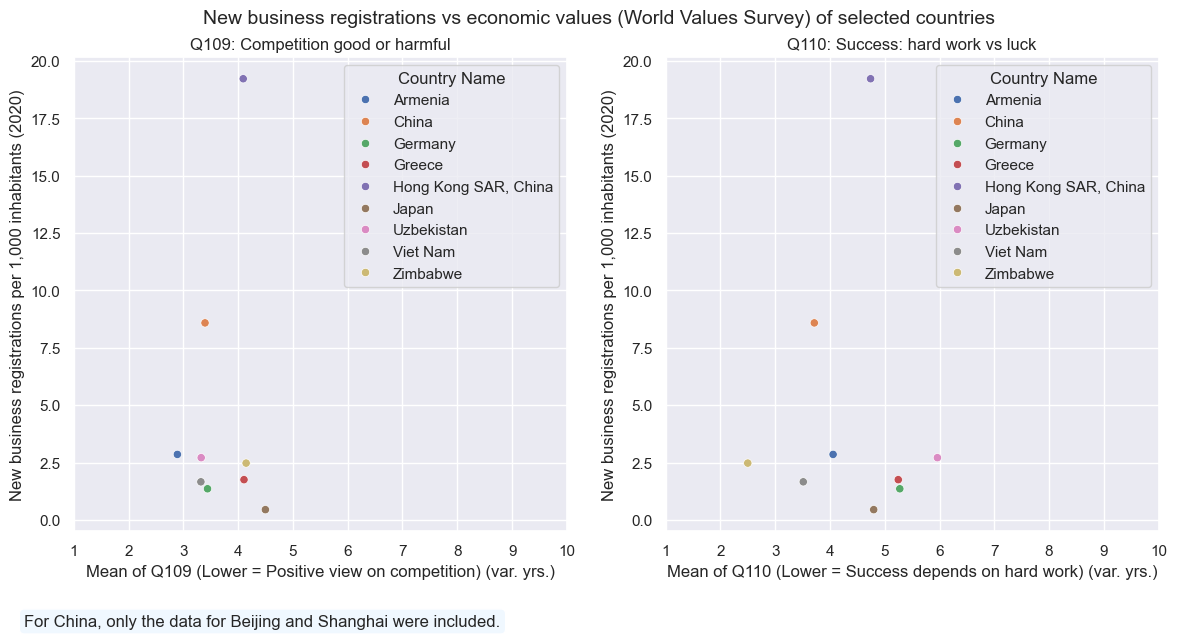

In [30]:
note = "For China, only the data for Beijing and Shanghai were included."
# Get unique values for hue because just using hue="country_name" will show all possible categeorical values,
# even though economy_analysis_df["country_name"].describe() shows it only has 11 unique values...
unique_country_names = new_business_analysis_df["country_name"].unique()

fig, axs = plt.subplots(1,2, figsize=(14,6))

q109_plot = sns.scatterplot(x="mean",
            y="new_businesses_per_1000_inhabitants_2020",
            hue="country_name",
            hue_order=unique_country_names,
            ax=axs[0],
            data=new_business_analysis_df
)
q109_plot.set_xlim(left=1, right=10)
q109_plot.set_xlabel("Mean of Q109 (Lower = Positive view on competition) (var. yrs.)")
q109_plot.set_ylabel("New business registrations per 1,000 inhabitants (2020)")
q109_plot.set_title("Q109: Competition good or harmful")

q110_plot = sns.scatterplot(x="mean_q110",
            y="new_businesses_per_1000_inhabitants_2020",
            hue="country_name",
            hue_order=unique_country_names,
            ax=axs[1],
            data=new_business_analysis_df
)
q110_plot.set_xlim(left=1, right=10)
q110_plot.set_xlabel("Mean of Q110 (Lower = Success depends on hard work) (var. yrs.)")
q110_plot.set_ylabel("New business registrations per 1,000 inhabitants (2020)")
q110_plot.set_title("Q110: Success: hard work vs luck")

axs[0].legend(title="Country Name")
axs[1].legend(title="Country Name")

axs[0].annotate(
    note,
    xy=(-0.1, -0.2),
    xycoords="axes fraction",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="aliceblue")
)

fig.suptitle("New business registrations vs economic values (World Values Survey) of selected countries", fontsize=14)
fig.subplots_adjust(top=0.9)

plt.show()

There is no clear sign of correlations between the answers to Q109 and Q110 as well as the number of business registrations per 1,000 inhabitants. Armenia, Uzbekistan and Germany all have a more positive or similiar positive views on competition in comparison with China (Beijing and Shanghai) but still have significatnly lower number of business registrations. A similar result can be obsvered for the Q110 plot. It would have been expected that countries such as Hong Kong and China would be far more towards the left side of each respective plot.

However, if you consider China's and Hong Kong's new business registration values to be outliers in these graphs, one could at least expect that there's a slight negative correlation between the answers to Q109 and new business registrations (e.g. compare values of Armenia, Germany and Japan). This can be seen in the group of values on the bottom left in the Q109 plot.

Let's group the countries into three different categories according to their number of new business registrations per 1,000 inhabitants and see whether there are notable differences in the values for Q109 and Q110 across those groups.

In [31]:
# using numpy's select method to create a new categorical value for the number of new business registrations per 1,000 inhabitants
conditions = [
    ((new_business_analysis_df["new_businesses_per_1000_inhabitants_2020"] > 0) & (new_business_analysis_df["new_businesses_per_1000_inhabitants_2020"] <= 1)),
    ((new_business_analysis_df["new_businesses_per_1000_inhabitants_2020"] > 1) & (new_business_analysis_df["new_businesses_per_1000_inhabitants_2020"] <= 5)),
    (new_business_analysis_df["new_businesses_per_1000_inhabitants_2020"] > 5)
]
values = ["low", "mid", "high"]
new_business_analysis_df["new_businesses_cat"] = np.select(conditions, values)
new_business_analysis_df

,country_name,new_businesses_per_1000_inhabitants_2020,count,mean,std,min,25%,50%,75%,max,count_q110,mean_q110,std_q110,min_q110,25%_q110,50%_q110,75%_q110,max_q110,new_businesses_cat
country_iso,,,,,,,,,,,,,,,,,,,
ARM,Armenia,2.855460,1101.0,2.891916,3.058541,1.0,1.0,1.0,5.0,10.0,1101.0,4.058129,3.530681,1.0,1.0,2.0,7.0,10.0,mid
CHN,China,8.583741,2962.0,3.396354,2.202259,1.0,2.0,3.0,5.0,10.0,2962.0,3.715057,2.722907,1.0,1.0,3.0,5.0,10.0,high
DEU,Germany,1.358457,1337.0,3.442034,2.159050,1.0,2.0,3.0,5.0,10.0,1337.0,5.275243,2.548146,1.0,3.0,5.0,7.0,10.0,mid
GRC,Greece,1.755010,1059.0,4.107649,2.292366,1.0,2.0,4.0,5.0,10.0,1059.0,5.247403,2.452802,1.0,3.0,5.0,7.0,10.0,mid
HKG,"Hong Kong SAR, China",19.218990,2014.0,4.093347,1.980086,1.0,3.0,4.0,5.0,10.0,2014.0,4.742304,2.381546,1.0,3.0,5.0,7.0,10.0,high
JPN,Japan,0.448848,1050.0,4.498095,2.245321,1.0,3.0,4.0,5.0,10.0,1050.0,4.799048,2.169772,1.0,3.0,5.0,6.0,10.0,low
UZB,Uzbekistan,2.712999,1109.0,3.326420,2.851916,1.0,1.0,2.0,5.0,10.0,1109.0,5.961226,3.139554,1.0,3.0,6.0,9.0,10.0,mid
VNM,Viet Nam,1.661228,1156.0,3.320934,2.625208,1.0,1.0,2.0,5.0,10.0,1156.0,3.513841,2.763206,1.0,1.0,3.0,5.0,10.0,mid
ZWE,Zimbabwe,2.476631,1182.0,4.146362,3.662021,1.0,1.0,2.0,8.0,10.0,1182.0,2.500846,2.733661,1.0,1.0,1.0,3.0,10.0,mid


In [32]:
all = valid_answers_filtered_df.join(new_business_analysis_df, on="country_iso")
all = all.loc[valid_answers_filtered_df["country_iso"].isin(selected_countries), :]

In [33]:
all

,interview_year,country_iso,interview_date,townsize,townsize_2,settlement,urban_rural,Q5,Q43,Q71,Q72,Q73,Q109,...,25%,50%,75%,max,count_q110,mean_q110,std_q110,min_q110,25%_q110,50%_q110,75%_q110,max_q110,new_businesses_cat
1004,2017,ARG,20170709,8,5,1,1,1,3,4,4,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,2017,ARG,20170709,8,5,1,1,2,1,3,3,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,2017,ARG,20170710,8,5,1,1,1,3,3,4,4,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,2017,ARG,20170710,8,5,1,1,2,3,4,4,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,2017,ARG,20170710,8,5,1,1,1,1,2,3,3,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97215,2020,ZWE,20200322,2,1,5,2,1,3,1,1,1,6,...,1.0,2.0,8.0,10.0,1182.0,2.500846,2.733661,1.0,1.0,1.0,3.0,10.0,mid
97216,2020,ZWE,20200322,2,1,5,2,1,3,4,4,4,10,...,1.0,2.0,8.0,10.0,1182.0,2.500846,2.733661,1.0,1.0,1.0,3.0,10.0,mid
97217,2020,ZWE,20200322,1,1,5,2,2,1,2,3,2,1,...,1.0,2.0,8.0,10.0,1182.0,2.500846,2.733661,1.0,1.0,1.0,3.0,10.0,mid
97218,2020,ZWE,20200322,1,1,5,2,1,3,2,2,2,1,...,1.0,2.0,8.0,10.0,1182.0,2.500846,2.733661,1.0,1.0,1.0,3.0,10.0,mid


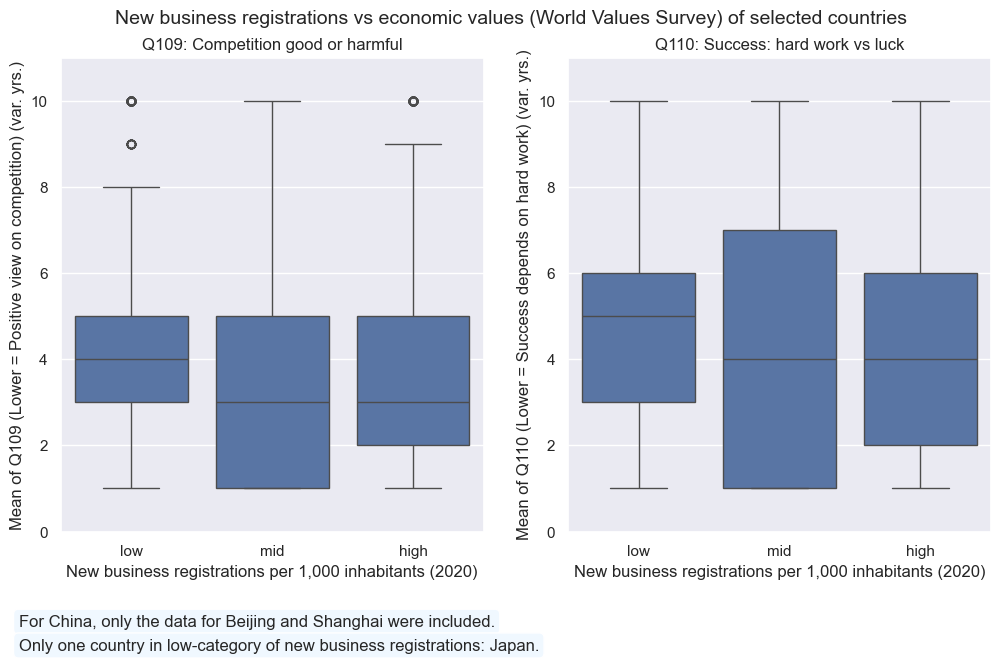

In [34]:
note2 = "Only one country in low-category of new business registrations: Japan."
# Get unique values for hue because just using hue="country_name" will show all possible categeorical values,
# even though economy_analysis_df["country_name"].describe() shows it only has 11 unique values...
unique_country_names = all["country_name"].unique()

fig, axs = plt.subplots(1,2, figsize=(12,6))

q109_plot = sns.boxplot(x="new_businesses_cat",
            y="Q109",
            order=["low", "mid", "high"],
            hue_order=unique_country_names,
            ax=axs[0],
            data=all
)
q109_plot.set_ylim(bottom=0, top=11)
q109_plot.set_ylabel("Mean of Q109 (Lower = Positive view on competition) (var. yrs.)")
q109_plot.set_xlabel("New business registrations per 1,000 inhabitants (2020)")
q109_plot.set_title("Q109: Competition good or harmful")

q110_plot = sns.boxplot(x="new_businesses_cat",
            y="Q110",
            order=["low", "mid", "high"],
            hue_order=unique_country_names,
            ax=axs[1],
            data=all
)
q110_plot.set_ylim(bottom=0, top=11)
q110_plot.set_ylabel("Mean of Q110 (Lower = Success depends on hard work) (var. yrs.)")
q110_plot.set_xlabel("New business registrations per 1,000 inhabitants (2020)")
q110_plot.set_title("Q110: Success: hard work vs luck")

axs[0].annotate(
    note,
    xy=(-0.1, -0.2),
    xycoords="axes fraction",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="aliceblue")
)
axs[0].annotate(
    note2,
    xy=(-0.1, -0.25),
    xycoords="axes fraction",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="aliceblue")
)

fig.suptitle("New business registrations vs economic values (World Values Survey) of selected countries", fontsize=14)
fig.subplots_adjust(top=0.9)

plt.show()

### 3.4) Verification of the Hypothesis
**Assumption:**

1) A positive view on competition (Q109 near 1) could be seen as one potential incentive for people to actually register a new company - hence, more business registrations would be expected.

2) The more respondents think that success depends on hard work (Q110 near 1), there more new business registrations would be expected to occur.

**Actual result:**


1) 🚧 With the help of the boxplot, it can be seen that the median values of Q109 for countries with a mid and high number of new business registrations are similar (at around 3), indicating a rather positive view on competition. Only for Japan (only country in the low-category), the median is higher (at around 4), indicating a more balanced view on competition.
However, you can note that the 50% quartile is bigger (ranging from about 1 to 5) for countries in the mid category of new business registrations in contrast to countries with high number of new business registrations (ranging from about 2 to 5). This contradicts the hypothesis as countries with a high number of business registrations have more respondents that have indicated a slightly less positive view towards competition within the interviews. Together with the mean values already analyzed, which are shown in the scatterplot, the hypothesis cannot be approved.

2) 🚧 The results for 1) are very similar to the results for the analysis of new business registrations per 1,000 inhabitants and the answers to Q110. Except for the numerical values, the trends and findings are the same. Thus, also hypothesis 2) cannot be approved.

Overall, these graphs indicate that the people's view on competition and the importance of hard work for success in life are not sufficient to predict numbers of new business registrations. There will be a plethora of other factors that are more influential towards the number of new business registrations in a given country.

Next step: Research more influential factors.

***The End***